The data set given for the assignment is from "https://archive-beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees" 
and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. 
The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
Date 
Quarter (Four Quarters)
Department (Sewing and Finishing)
Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
Team 
Targeted_Producitivity (Target which needs to be achieved)
SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment 
WIP (Work in progress)
Over_time
Incentive 
Idle_time
Idle_men (Idle workers)
no_of_style_change
no_of_workers
Actual_Producitivity

The aim is of this assignment is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect. 

Suppose the manager is interested in the following questions 
1. Basic Summary statistics of the data for the numerical variables 
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department 
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram plot of actual productivity based on all working days, team size and Conclude accordingly 
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

12. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

13. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis 

14. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

15. Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.stats import weightstats as stests

from scipy.stats import chi2_contingency
from scipy.stats import chi2

import warnings
warnings.filterwarnings("ignore")

In [32]:
#Import Dataset
df=pd.read_csv('garments_worker_productivity.csv')

In [33]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/15,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01/01/15,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01/01/15,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01/01/15,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01/01/15,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [34]:
df.shape

(1197, 15)

In [35]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

#  Basic Summary statistics of the data for the numerical variable

In [36]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


 # basic Summary of the data for the number of working days, count of quarters in the year

In [37]:
workingdays=df.groupby('quarter')['day'].describe()

print(workingdays)

         count unique        top freq
quarter                              
Quarter1   360      6    Tuesday   62
Quarter2   335      6     Sunday   64
Quarter3   210      6  Wednesday   40
Quarter4   248      6   Saturday   44
Quarter5    44      2   Saturday   24


# Mean and standard deviation of actual producivity for every quarter and   
#  Histogram plot of actual productivity based on every quarter and conclusion accordingly

In [38]:
df.groupby('quarter')['actual_productivity'].mean()


quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.709067
Quarter5    0.826177
Name: actual_productivity, dtype: float64

<Axes: xlabel='actual_productivity', ylabel='Count'>

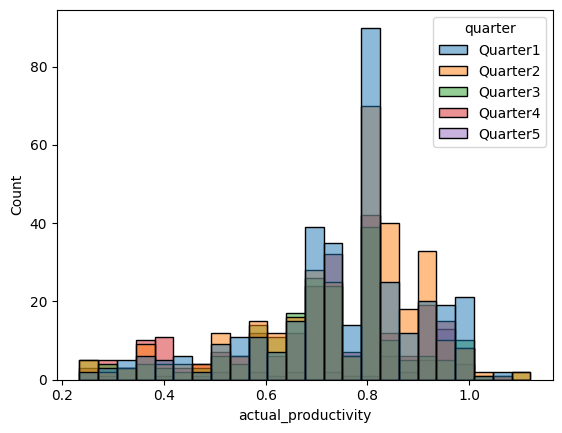

In [39]:
sns.histplot(data=df,x=df['actual_productivity'], hue=df['quarter'])

 # Number count for sewing and finishing department

In [40]:
sewing_count=df[df['department']=='sewing']['department'].count()
print("Sewing Count: \n ",sewing_count)

finishing_count=df[df['department']=='finishing']['department'].count()
print("Finishing Count:\n ",finishing_count)

Sewing Count: 
  691
Finishing Count:
  506


# Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity  based on both department and conclusion accordingly

In [41]:
mean_actual_productivity_sewing=df[df['department']=='sewing']['actual_productivity'].mean()
print("Mean of Actual Productivity for Sewing: ",mean_actual_productivity_sewing)

std_actual_productivity_sewing=df[df['department']=='sewing']['actual_productivity'].std()
print("\nStandard Deviation of Actual Productivity for Sewing: ",std_actual_productivity_sewing)


mean_actual_productivity_finishing=df[df['department']=='finishing']['actual_productivity'].mean()
print("\nMean of Actual Productivity for Finishing: ",mean_actual_productivity_finishing)


std_actual_productivity_finishing=df[df['department']=='finishing']['actual_productivity'].std()
print("\nStandard Deviation of Actual Productivity for Finishing: ",std_actual_productivity_finishing)

Mean of Actual Productivity for Sewing:  0.7220130317105644

Standard Deviation of Actual Productivity for Sewing:  0.15478432010106713

Mean of Actual Productivity for Finishing:  0.7529506683241106

Standard Deviation of Actual Productivity for Finishing:  0.1970209830649775


# Number count for each teams, smv across the year

In [42]:
df['month'] = pd.DatetimeIndex(df['date']).month 

team_smv_count = df.groupby(['team', 'smv', 'month']).size()

print(team_smv_count)

team  smv    month
1     3.94   1        23
             2        16
             3        10
      22.52  2        15
      22.53  2         2
                      ..
12    15.26  1        11
             2        23
             3        10
      26.16  1         1
      26.87  1         1
Length: 205, dtype: int64


 # Histogram plot of actual productivity based on all working days, team size

Text(0.5, 1.0, 'Histogram Plot between Actual Productivity vs Working Day')

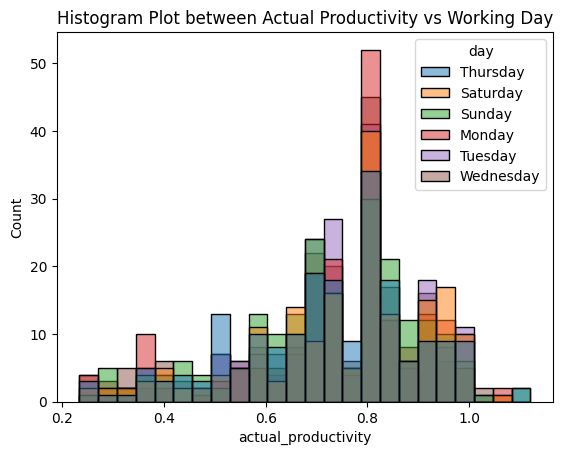

In [43]:
sns.histplot(data=df,x=df['actual_productivity'], hue=df['day'])
plt.title("Histogram Plot between Actual Productivity vs Working Day")

Text(0.5, 1.0, 'Histogram Plot between Actual Productivity vs Team Size')

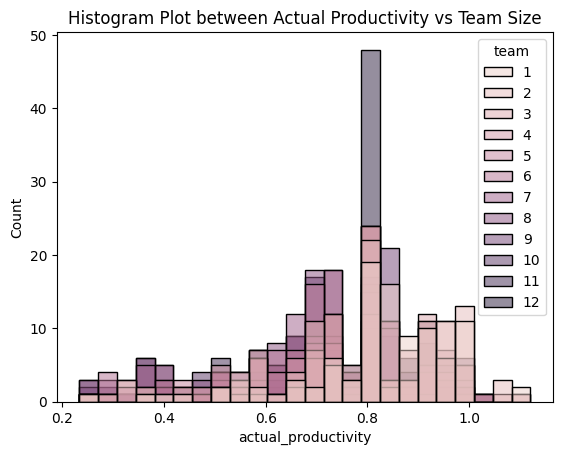

In [44]:
sns.histplot(data=df,x=df['actual_productivity'], hue=df['team'])
plt.title("Histogram Plot between Actual Productivity vs Team Size")

# Find correlation matrix and draw heat map for all variables

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
 15  mont

<Axes: >

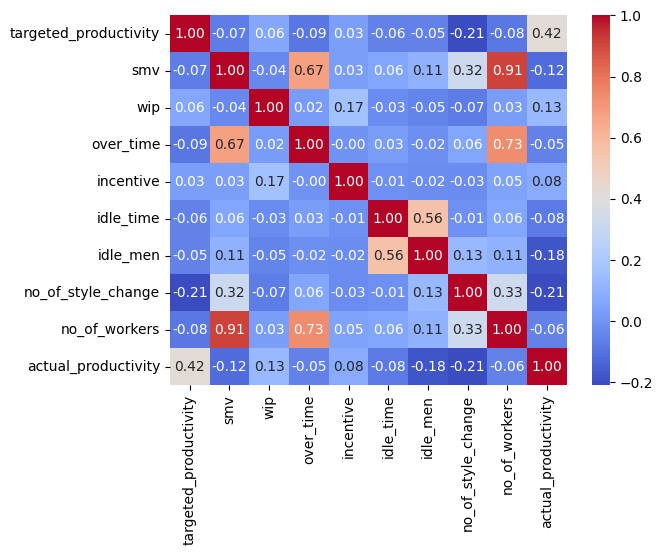

In [46]:
df_new=df.drop(['date','quarter','department','day','team','month'],axis=1)

import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 120)

corr_matrix = df_new.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


# Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)

In [47]:
#No significant correlation between actual , targeted prodcutivity with incentives.")
#No significant correlation between actual , targeted prodcutivity with overtime.")

# Find the correlation between actual and target productivity for every quarter and for every department. 
# What do you conclude

In [48]:
#No high correlation between actual productivity and target productivity.")
#Therefore we can conclude that the company is not able to meet the target.")

11. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

12. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

13. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing department. State your null and alternative hypothesis 

14. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30. 

15. Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his 
    hypothesis is right or not 

In [49]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,01/01/15,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,01/01/15,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,01/01/15,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,01/01/15,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,01/01/15,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [50]:
#11
#Given Details
#n>30
sigma=0.1
alpha=0.05
mu=0.75

#Hypothesis:
print("H0: Finishing Department has achieved average productivity <= 0.75")
print("H1: Finishing Department has achieved average productivity > 0.75 (claim)")


CV=stats.norm.isf(alpha)

print("\nCritical Value:", CV)


t_val, p_val= stests.ztest( df[df['department']=='finishing']['actual_productivity'], value=mu, alternative='larger')


print(f"\nt-value: {t_val}, p-value: {p_val}")

#Decision
print(f"Test Value |{t_val}| < Critical Value |{CV}|")
print(f"P Value |{p_val}| > Alpha |{alpha}|")
print("\nTherefore we cannot reject H0.")


#Conclusion
print("There is not enough evidence to support the claim that Finishing Department has achieved mean productivity > 0.75")


H0: Finishing Department has achieved average productivity <= 0.75
H1: Finishing Department has achieved average productivity > 0.75 (claim)

Critical Value: 1.6448536269514729

t-value: 0.33688616122943815, p-value: 0.3681013589531266
Test Value |0.33688616122943815| < Critical Value |1.6448536269514729|
P Value |0.3681013589531266| > Alpha |0.05|

Therefore we cannot reject H0.
There is not enough evidence to support the claim that Finishing Department has achieved mean productivity > 0.75


In [51]:
#12
#Given Details
#n>30
sigma=0.1
alpha=0.05
mu=0.75

print("Hypothesis:")
print("H0: Sewing department has achieved average productivity <= 0.75")
print("H1: Sewing department has achieved average productivity > 0.75 (claim)")


CV=stats.norm.isf(alpha)

print("\nCritical Value:",CV)


t_val, p_val= stests.ztest(df[df['department']=='sewing']['actual_productivity'], value=mu, alternative='larger')

print(f"\nt-value: {t_val} , p-value: {p_val}")

#Decision:
print(f"t-value |{t_val}| < Critical Value |{CV}|")
print(f"p-value |{p_val}| > alpha |{alpha}|")
print("Therefore we cannot reject H0.")


#Conclusion:
print("There is not enough evidence to support the claim that Sewing department has achieved average productivity > 0.75  ")



Hypothesis:
H0: Sewing department has achieved average productivity <= 0.75
H1: Sewing department has achieved average productivity > 0.75 (claim)

Critical Value: 1.6448536269514729

t-value: -4.753001108226257 , p-value: 0.9999989979037549
t-value |-4.753001108226257| < Critical Value |1.6448536269514729|
p-value |0.9999989979037549| > alpha |0.05|
Therefore we cannot reject H0.
There is not enough evidence to support the claim that Sewing department has achieved average productivity > 0.75  


In [52]:
#13

#Given details 
n1=30
n2=30

alpha=0.05

#Create Two Independent Samples
sewing_productivity=df[df['department']=='sewing']['actual_productivity'].head(30)
finishing_productivity=df[df['department']=='finishing']['actual_productivity'].head(30)

#Hypothesis: 
print("H0: Average productivity of the finishing department - Average productivity of the sewing department <=0 ")    
print("H1: Average productivity of the finishing department - Average productivity of the sewing department >0 (claim)")

lavene_stat, lavene_p_value = stats.levene(sewing_productivity, finishing_productivity)

print(f"As Lavene Test's p-value {lavene_p_value} < alpha {alpha}.\nTherefore both samples have unequal variances.")
 
    
t_val,p_val=stats.ttest_ind(sewing_productivity, finishing_productivity,equal_var=False)

print(f"\nAs Two sample t-test p-value |{p_val}| > alpha |{alpha}|")
print("Therefore, we cannot reject H0. ")

#Conclusion
print("There is not enough evidence to support the claim that Average productivity of the finishing department - Average productivity of the sewing department > 0.")



H0: Average productivity of the finishing department - Average productivity of the sewing department <=0 
H1: Average productivity of the finishing department - Average productivity of the sewing department >0 (claim)
As Lavene Test's p-value 2.7982149624090482e-05 < alpha 0.05.
Therefore both samples have unequal variances.

As Two sample t-test p-value |0.9081774513669003| > alpha |0.05|
Therefore, we cannot reject H0. 
There is not enough evidence to support the claim that Average productivity of the finishing department - Average productivity of the sewing department > 0.


In [53]:
#14

#Given Details
n1=30
n2=30
alpha=0.05


finishing_incentive=df[df['department']=='finishing']['incentive'].head(60)
sewing_incentive=df[df['department']=='sewing']['incentive'].head(300).tail(60)


shapiro_finishing_stat,shapiro_finishing_pval=stats.shapiro(finishing_incentive)
print(shapiro_finishing_pval)

shapiro_sewing_stat,shapiro_sewing_pval=stats.shapiro(sewing_incentive)
print(shapiro_sewing_pval)

print(f"\nShapiro Test p-value for both the samples > alpha |{alpha}|.\nTherefore the samples are randomly distributed.")


#Hypothesis:
print("H0: Average Incentive of Finishing department - Average Incentive Sewing department <=0")
print("H1: Average Incentive of Finishing department - Average Incentive Sewing department >  0")


lavene_pval, lavene_pval = stats.levene(finishing_incentive,sewing_incentive)

print(f"\nLavene Test's p-value |{lavene_pval}| < alpha |{alpha}|.\nTherefore both the samples have unequal variances.")


t_val, p_val=stats.ttest_ind(finishing_incentive, sewing_incentive, equal_var=False)

print("\nTwo sample t-test p-value:",p_val)

#Decision
print(f"As two sample t-Test p-value |{p_val}| < alpha |{alpha}|.\nTherefore we can reject H0.")
      

#Conclusion
print("There is enough evidence to support the claim that Average Incentive of Finishing department - Average Incentive Sewing department > 0")


1.0
0.10865028202533722

Shapiro Test p-value for both the samples > alpha |0.05|.
Therefore the samples are randomly distributed.
H0: Average Incentive of Finishing department - Average Incentive Sewing department <=0
H1: Average Incentive of Finishing department - Average Incentive Sewing department >  0

Lavene Test's p-value |4.3210176080251995e-17| < alpha |0.05|.
Therefore both the samples have unequal variances.

Two sample t-test p-value: 1.0195268901699233e-21
As two sample t-Test p-value |1.0195268901699233e-21| < alpha |0.05|.
Therefore we can reject H0.
There is enough evidence to support the claim that Average Incentive of Finishing department - Average Incentive Sewing department > 0


In [54]:
#15
q1= df[df['quarter']=='Quarter1']['actual_productivity']
q2= df[df['quarter']=='Quarter2']['actual_productivity']
q3= df[df['quarter']=='Quarter3']['actual_productivity']
q4= df[df['quarter']=='Quarter4']['actual_productivity']

#Hypothesis:
print("H0: All quareters have equal average productivity ")
print("H0: Atleast one quareter has different average productivity ")


#Calculating Critical Value
k=4
N=len(df)
dfN=k-1
dfD=N-k

cv=stats.f.isf(0.05,dfN,dfD)
print("\nCritical Value:",cv)

#Check for equality of variances
variance_tval,variance_pval =stats.levene(q1,q2,q3,q4)
print(f"\nLevene's p-value for Variance:{variance_pval}")


tval,pval =stats.f_oneway(q1,q2,q3,q4)
print(f"\nOneway ANOVA's tvalue:{tval}, p-value:{pval}")

#Decision:
print(f"Reject H0 as p-value |{pval}|< alpha |{alpha}| and test-value |{tval}| > critical value |{cv}| ")

#Conclusion:
print("There is enough evidence to support the claim that atleast one quarter has different average productivity")


H0: All quareters have equal average productivity 
H0: Atleast one quareter has different average productivity 

Critical Value: 2.6123621914367705

Levene's p-value for Variance:0.08246483203771338

Oneway ANOVA's tvalue:5.274463802636486, p-value:0.0012927759459059219
Reject H0 as p-value |0.0012927759459059219|< alpha |0.05| and test-value |5.274463802636486| > critical value |2.6123621914367705| 
There is enough evidence to support the claim that atleast one quarter has different average productivity


In [55]:
#16

alpha=0.05

#Hypothesis:

print("H0: Actual Productivity and Department are indepenednent")
print("H1: Actual Productivity is dependent on Department (Claim)")


#Get the cross tabulation table 
observed = pd.crosstab(df['department'],df['actual_productivity'])
observed

H0: Actual Productivity and Department are indepenednent
H1: Actual Productivity is dependent on Department (Claim)


actual_productivity,0.233705,0.235795,0.238042,0.246250,0.247316,0.249417,0.251399,0.256500,0.258000,0.259375,...,1.033156,1.033570,1.050281,1.050667,1.057963,1.059621,1.096633,1.100484,1.108125,1.120437
department,,,,,,,,,,,,,,,,,,,,,
finishing,0,1,1,1,1,0,0,1,1,1,...,1,1,0,1,1,1,1,0,1,1
sewing,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [56]:
print("Columns:",len(observed.columns))
print("Rows:",len(observed))

Columns: 879
Rows: 2


In [57]:
#Create the values of the table
observed_values = observed.values
observed_values

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [58]:
#Get the critical Value
R=879
C=2

dof=(R-1)*(C-1)

cv=chi2.isf(alpha,df=dof)

print("Critical Value = ", cv)

Critical Value =  948.0451836927294


In [59]:
tval, pval, df, expected = chi2_contingency(observed_values, correction=False)
print(f"Chi Square Test t-value |{tval}|, p-value |{pval}|")

#Decision:
print(f"Reject H0 since p-value |{pval}| << alpha |{alpha}| and t-value |{tval}| >> Critical Value |{cv}|")

#Conclusion:
print("There is enough evidence to support the claim that Department and Actual Productivity are related.")

Chi Square Test t-value |1197.0|, p-value |3.379397973696696e-12|
Reject H0 since p-value |3.379397973696696e-12| << alpha |0.05| and t-value |1197.0| >> Critical Value |948.0451836927294|
There is enough evidence to support the claim that Department and Actual Productivity are related.
